In [1]:
import numpy as np 
import pandas as pd 
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn import neighbors
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.cluster import KMeans

df = pd.read_csv("E:/heart.csv")
heart = pd.read_csv("E:/heart.csv")

ModuleNotFoundError: No module named 'sklearn'

# About Dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [1744]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [1746]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


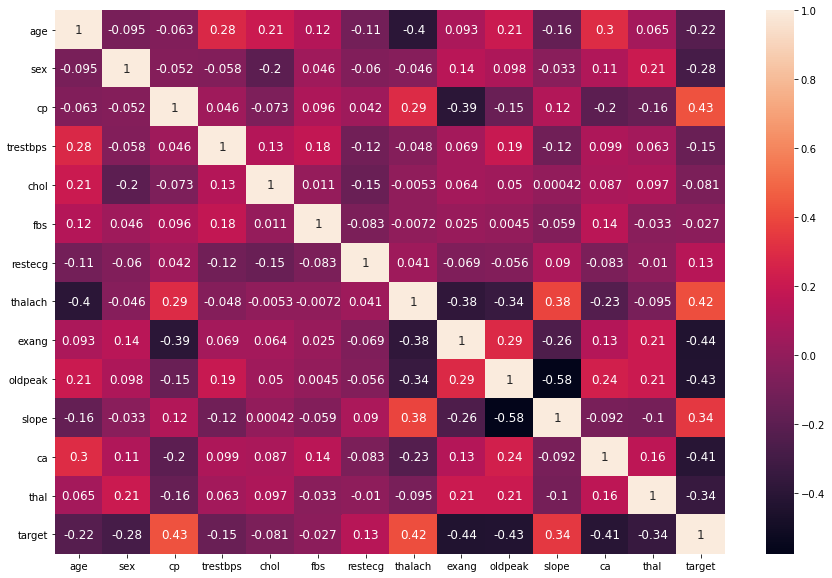

In [1747]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, annot_kws = {"size":12})

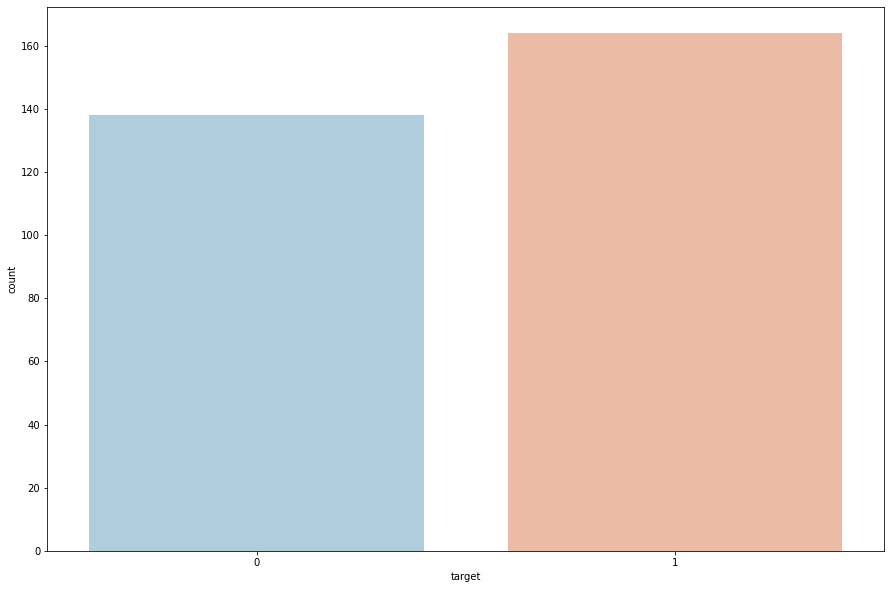

In [1748]:
plt.figure(figsize = (15,10))
sns.countplot(x = "target", data = df, palette = "RdBu_r")

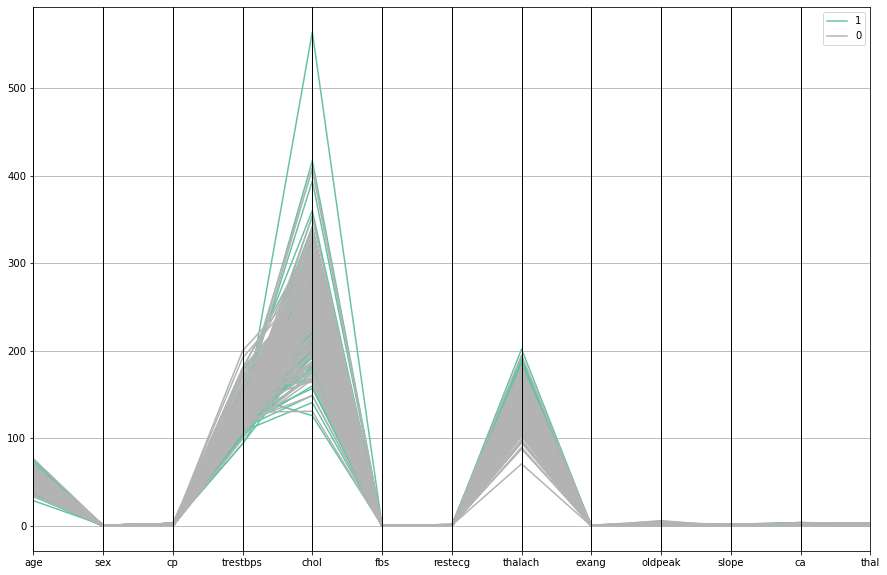

In [1749]:
plt.figure(figsize = (15,10))
parallel_coordinates(df, 'target', colormap=plt.get_cmap("Set2"))
plt.show()

# Finding and Removing Outliers

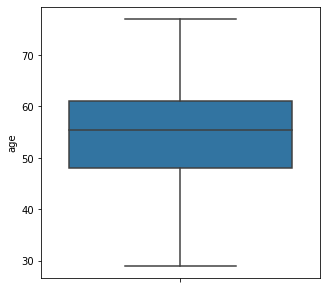

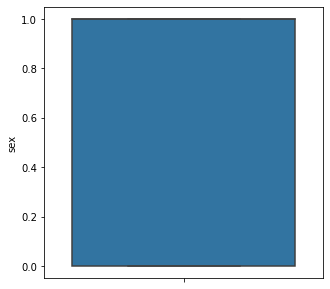

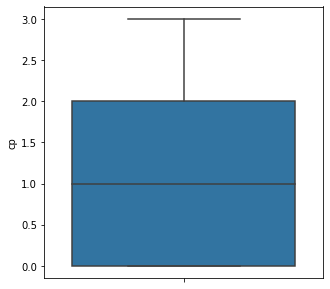

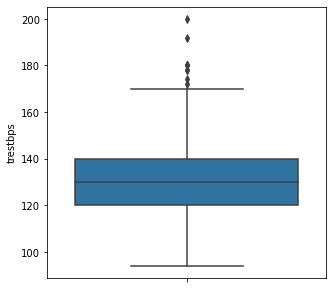

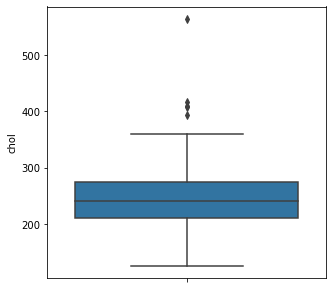

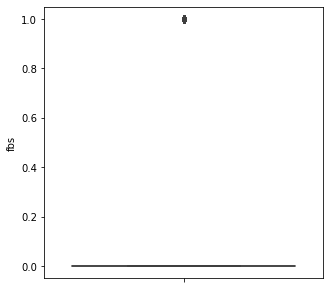

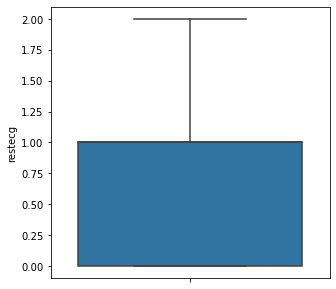

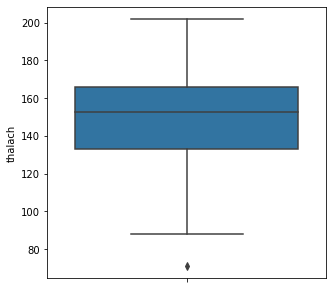

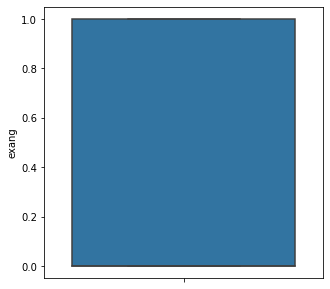

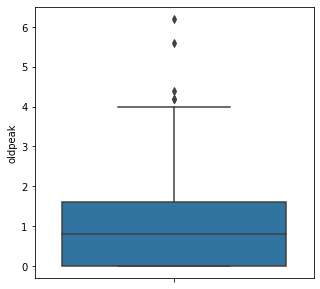

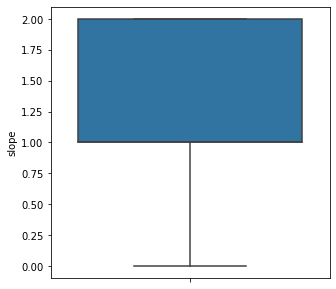

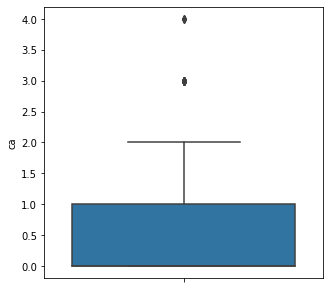

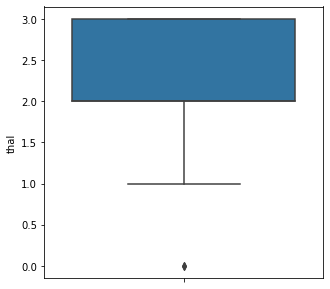

In [1750]:
for column in heart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = heart[column])

In [1751]:
Q1 = np.percentile(heart.age, 25)  
Q3 = np.percentile(heart.age, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.age: 
    if (x<low_lim) or (x>up_lim):
        heart['age'] = heart['age'].replace({x:heart.age.mean()}) 

Q1 = np.percentile(heart.trestbps, 25)  
Q3 = np.percentile(heart.trestbps, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.trestbps: 
    if (x<low_lim) or (x>up_lim):
        heart['trestbps'] = heart['trestbps'].replace({x:heart.trestbps.mean()}) 
       

Q1 = np.percentile(heart.chol, 25)  
Q3 = np.percentile(heart.chol, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.chol: 
    if (x<low_lim) or (x>up_lim):
        heart['chol'] = heart['chol'].replace({x:heart.chol.mean()}) 
       

Q1 = np.percentile(heart.thalach, 40)  
Q3 = np.percentile(heart.thalach, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thalach: 
    if (x<low_lim) or (x>up_lim):
        heart['thalach'] = heart['thalach'].replace({x:heart.thalach.mean()}) 
        

Q1 = np.percentile(heart.oldpeak, 25)  
Q3 = np.percentile(heart.oldpeak, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.oldpeak: 
    if (x<low_lim) or (x>up_lim):
        heart['oldpeak'] = heart['oldpeak'].replace({x:heart.oldpeak.mean()})
        
Q1 = np.percentile(heart.ca, 25)  
Q3 = np.percentile(heart.ca, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.ca: 
    if (x<low_lim) or (x>up_lim):
        heart['ca'] = heart['ca'].replace({x:heart.ca.mean()})

Q1 = np.percentile(heart.thal, 25)  
Q3 = np.percentile(heart.thal, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thal: 
    if (x<low_lim) or (x>up_lim):
        heart['thal'] = heart['thal'].replace({x:heart.thal.mean()})

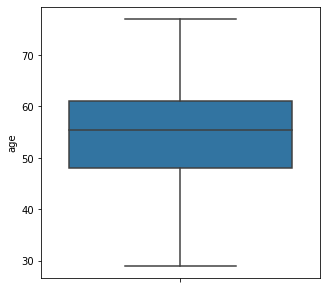

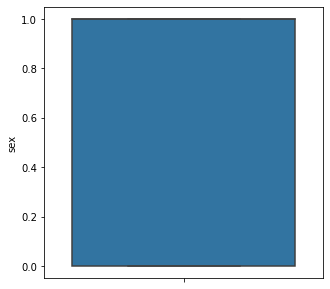

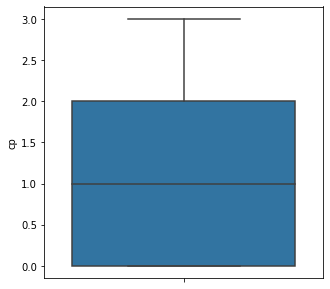

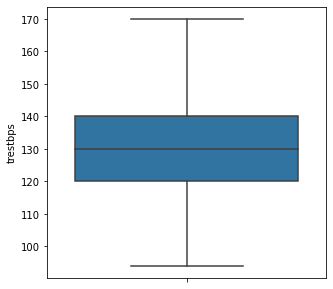

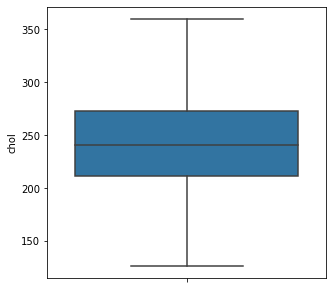

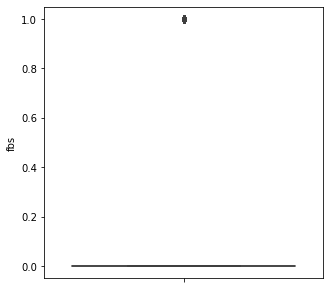

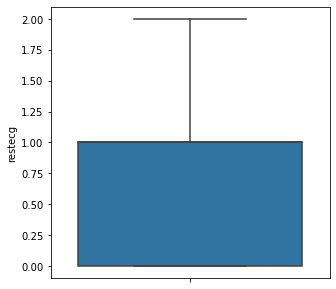

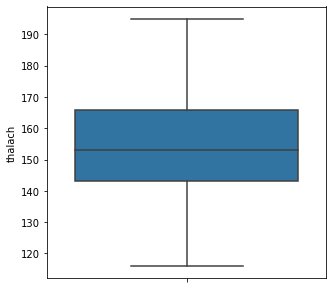

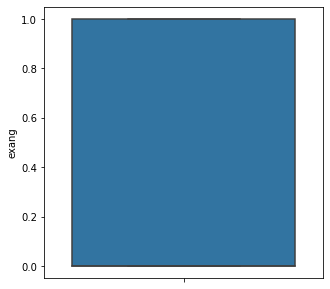

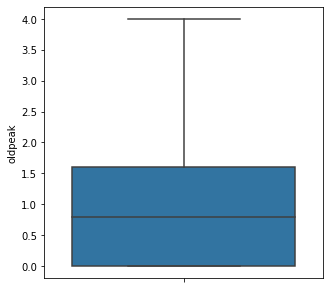

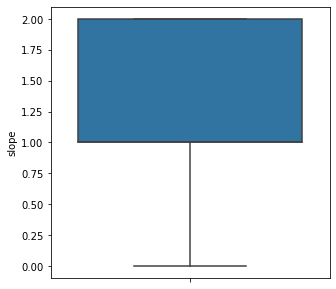

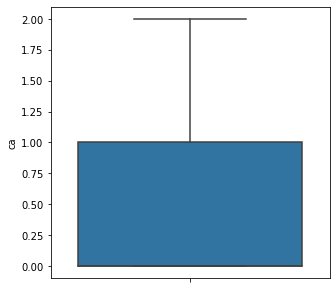

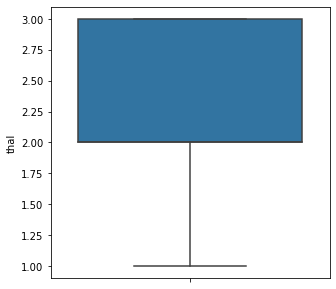

In [1752]:
meanheart = pd.DataFrame(heart)
for column in meanheart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = meanheart[column])

In [1753]:
heart = pd.read_csv("E:/heart.csv")

In [1754]:
Q1 = np.percentile(heart.age, 25)  
Q3 = np.percentile(heart.age, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.age: 
    if (x<low_lim) or (x>up_lim):
        heart['age'] = heart['age'].replace({x:heart.age.median()}) 

Q1 = np.percentile(heart.trestbps, 25)  
Q3 = np.percentile(heart.trestbps, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.trestbps: 
    if (x<low_lim) or (x>up_lim):
        heart['trestbps'] = heart['trestbps'].replace({x:heart.trestbps.median()}) 
       

Q1 = np.percentile(heart.chol, 25)  
Q3 = np.percentile(heart.chol, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.chol: 
    if (x<low_lim) or (x>up_lim):
        heart['chol'] = heart['chol'].replace({x:heart.chol.median()}) 
       

Q1 = np.percentile(heart.thalach, 40)  
Q3 = np.percentile(heart.thalach, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thalach: 
    if (x<low_lim) or (x>up_lim):
        heart['thalach'] = heart['thalach'].replace({x:heart.thalach.median()}) 
        

Q1 = np.percentile(heart.oldpeak, 25)  
Q3 = np.percentile(heart.oldpeak, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.oldpeak: 
    if (x<low_lim) or (x>up_lim):
        heart['oldpeak'] = heart['oldpeak'].replace({x:heart.oldpeak.median()})
        
Q1 = np.percentile(heart.ca, 25)  
Q3 = np.percentile(heart.ca, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.ca: 
    if (x<low_lim) or (x>up_lim):
        heart['ca'] = heart['ca'].replace({x:heart.ca.median()})

Q1 = np.percentile(heart.thal, 25)  
Q3 = np.percentile(heart.thal, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thal: 
    if (x<low_lim) or (x>up_lim):
        heart['thal'] = heart['thal'].replace({x:heart.thal.median()})

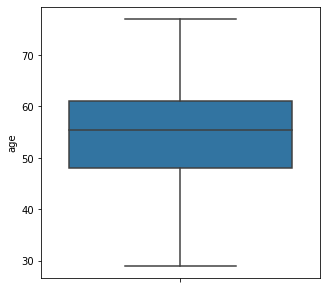

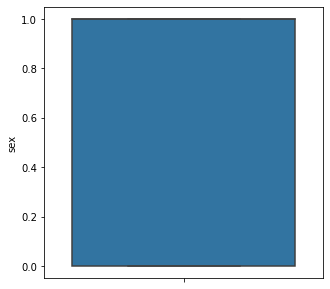

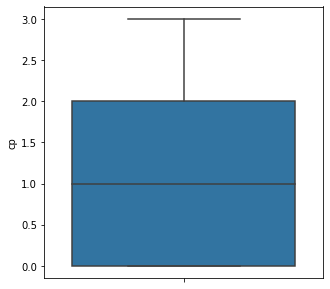

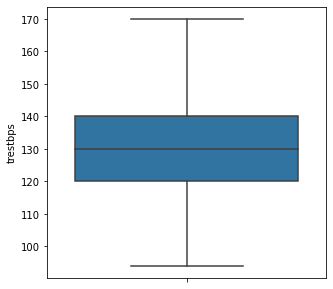

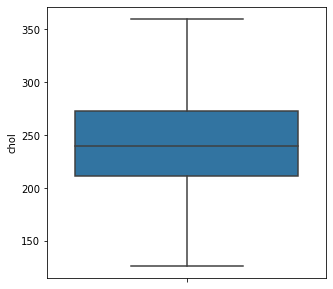

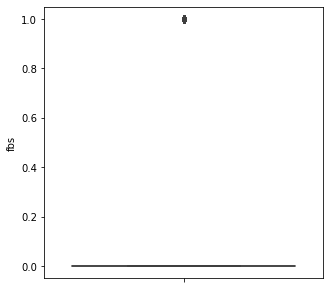

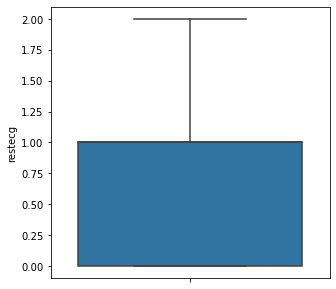

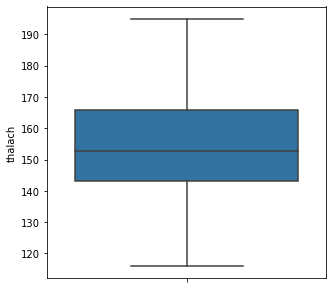

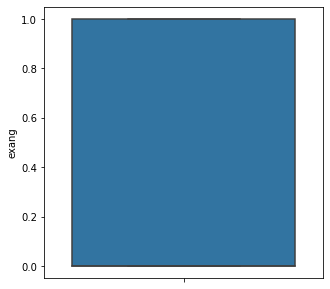

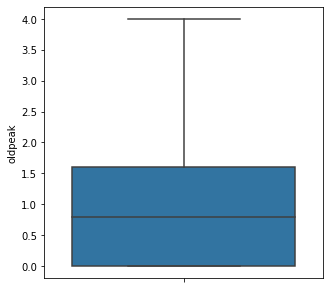

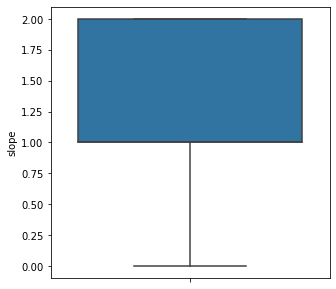

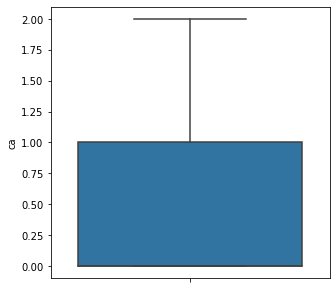

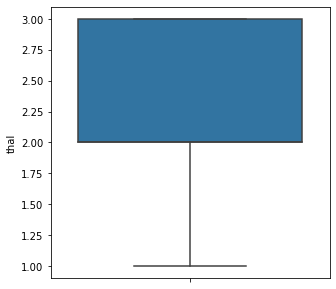

In [1755]:
medianheart = pd.DataFrame(heart)
for column in medianheart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = medianheart[column])

MODE DOES NOT REMOVE OUTLIERS FOR THIS PARTICULAR DATA SET

# Scaling

In [1756]:
df_scaled = pd.DataFrame(preprocessing.scale(df.drop("target", axis = 1)), columns = df.drop("target", axis = 1).columns).join(df.target)
meanheart = pd.DataFrame(preprocessing.scale(meanheart.drop("target", axis = 1)), columns = meanheart.drop("target", axis = 1).columns).join(meanheart.target)
medianheart = pd.DataFrame(preprocessing.scale(medianheart.drop("target", axis = 1)), columns = medianheart.drop("target", axis = 1).columns).join(medianheart.target)

In [1757]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1758]:
meanheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,0.682656,1.976470,0.985321,-0.231281,2.389793,-1.002541,-0.236037,-0.698344,1.271501,-2.271182,-0.749898,-2.284648,1
1,-1.928548,0.682656,1.005911,-0.006447,0.150327,-0.418446,0.901657,1.945672,-0.698344,2.426087,-2.271182,-0.749898,-0.566735,1
2,-1.485726,-1.464866,0.035352,-0.006447,-0.882260,-0.418446,-1.002541,1.061195,-0.698344,0.405561,0.979514,-0.749898,-0.566735,1
3,0.174856,0.682656,0.035352,-0.667625,-0.163938,-0.418446,0.901657,1.414986,-0.698344,-0.171732,0.979514,-0.749898,-0.566735,1
4,0.285561,-1.464866,-0.935208,-0.667625,2.484872,-0.418446,0.901657,0.530509,1.431958,-0.364163,0.979514,-0.749898,-0.566735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,-1.464866,-0.935208,0.654731,-0.051700,-0.418446,0.901657,-1.828094,1.431958,-0.749025,-0.645834,-0.749898,1.151177,0
298,-1.042904,0.682656,1.976470,-1.328803,0.464593,-0.418446,0.901657,-1.297408,-0.698344,0.213130,-0.645834,-0.749898,1.151177,0
299,1.503322,0.682656,-0.935208,0.919203,-1.129183,2.389793,0.901657,-0.766723,-0.698344,2.329872,-0.645834,2.123334,1.151177,0
300,0.285561,0.682656,-0.935208,-0.006447,-2.520931,-0.418446,0.901657,-0.240584,1.431958,0.213130,-0.645834,0.686718,1.151177,0


In [3]:
medianheart

NameError: name 'medianheart' is not defined

# Models

## LOGISTIC REGRESSION

## DECISION TREE

## NAIVE BAYES

## KNN

### Mean

In [2]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.4, random_state = 495)

# Convert DataFrame data into np.arrays
# The scikit-learn library requires the data be formatted as a numpy array.
# Here are doing the reformatting
X = np.array(X_train)
print(X, X.shape, "\n")

y = np.array(y_train)
print(y, y.shape, "\n")

clf = neighbors.KNeighborsClassifier(12, weights='uniform')
trained_model = clf.fit(X, y)
print ("Trained Model:", trained_model, "\n")

# view the model's score, which will indicate how good my model has been trained
print ("Score = ", trained_model.score(X, y), "\n")

# Apply the learner to the new, unclassified observation.
y_pred = trained_model.predict(X_test)
print(y_pred, "\n")

# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained_model.predict_proba(X_test)
print(y_pred_proba, "\n")

#Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion, "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

NameError: name 'train_test_split' is not defined

#### ROC AUC 

In [1761]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.58 0.42]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.58 0.42]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.42 0.58]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.75 0.25]
 [0.92 0.08]
 [0.83 0.17]
 [0.58 0.42]
 [0.58 0.42]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [1762]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 56 (90%)
True Negative (TN, specificity): 46 (77%)
False Positive (FP): 13 (22%)
False Negative (FN): 6 (9%)


In [1763]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8429752066115702
recall: 0.9032258064516129
precision: 0.8115942028985508
f1: 0.8549618320610687


Confusion matrix, without normalization
[[46 13]
 [ 6 56]]
Normalized confusion matrix
[[0.78 0.22]
 [0.1  0.9 ]]


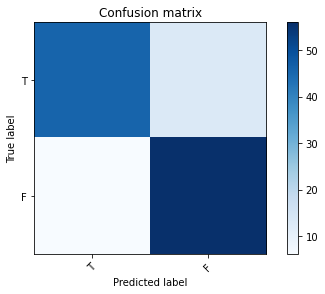

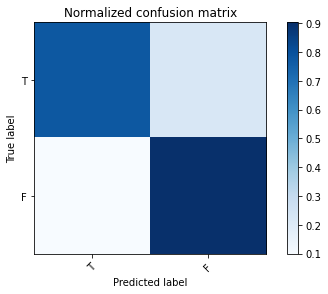

In [1764]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [1765]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_hat)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
Y_HAT: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1]
FPR: [0.   0.22 1.  ]
TPR: [0.  0.9 1. ]
thresholds: [2 1 0]
Optimal threshold index: 1
Optimal threshold value: 1
AUC: 0.8414434117003828


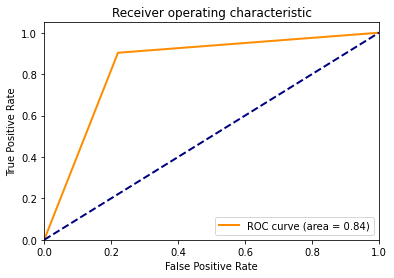

In [1766]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [1767]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.22 1.  ]
TPR: [0.  0.9 1. ]
thresholds: [2 1 0]


In [1768]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 1 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.58 0.42]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.58 0.42]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.42 0.58]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.75 0.25]
 [0.92 0.08]
 [0.83 0.17]
 [0.58 0.42]
 [0.58 0.42]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [1769]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negatice count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negatice count: 59
Count: 121
True Positive (TP, sensativity): 16 (25%)
True Negative (TN, specificity): 57 (96%)
False Positive (FP): 2 (3%)
False Negative (FN): 46 (74%)


In [1770]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.6033057851239669
recall: 0.25806451612903225
precision: 0.8888888888888888
f1: 0.39999999999999997


Confusion matrix, without normalization
[[57  2]
 [46 16]]
Normalized confusion matrix
[[0.97 0.03]
 [0.74 0.26]]


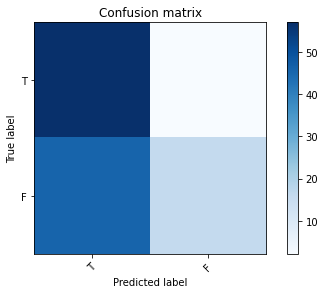

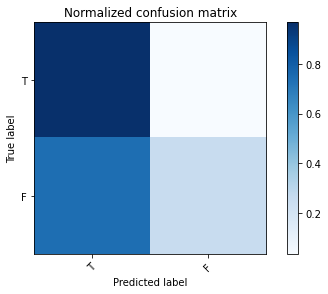

In [1771]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [1772]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [1773]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.99 0.01 0.06 0.99 0.89 0.98 0.66 0.91 0.12 0.22 0.29 0.62 0.99 0.81
 0.08 0.86 0.32 0.99 0.24 0.28 0.98 0.64 0.99 0.52 0.36 0.99 0.63 0.45
 0.77 0.22 0.69 0.99 0.75 0.23 0.08 0.88 0.02 0.01 0.45 0.52 0.07 0.1
 0.01 0.89 0.27 0.84 0.04 0.94 0.95 0.32 0.2  0.04 0.02 0.14 0.99 0.09
 0.33 0.22 0.12 0.26 0.37 0.4  0.06 0.01 0.16 0.99 0.91 0.27 0.99 0.77
 0.7  0.99 0.91 0.32 0.01 0.58 0.59 0.97 0.93 0.72 0.81 0.95 0.99 0.95
 0.92 0.12 0.99 0.45 0.86 0.97 0.34 0.76 0.6  0.72 0.13 0.01 0.78 0.28
 0.99 0.73 0.19 0.29 0.88 0.75 0.82 0.87 0.86 0.02 0.86 0.58 0.01 0.33
 0.42 0.41 0.73 0.45 0.99 0.63 0.99 0.83 0.66 0.91 0.14 0.01 0.98 0.99
 0.9  0.44 0.84 0.12 0.01 0.34 0.56 0.99 0.91 0.4  0.84 0.38 0.99 0.21
 0.44 0.96 0.51 0.99 0.69 0.49 0.88 0.62 0.47 0.86 0.28 0.78 0.93 0.77
 0.36 0.01 0.99 0.05 0.05 0.65 0.4  0.08 0.2  0.01 0.99 0.46 0.99 0.27
 0.81 0.84 0.41 0.09 0.08 0.12 0.11 0.99 0.01 0.56 0.22 0.36 0.23 0.33
 0.31 0.21 0.01 0.15 0.99 0.91 0.08 0.85 0.79 0.75 0.94 0.79 0.18 0.21
 0.41 0

In [1774]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

,y,y_hat,bucket
0,1,0.99,1
156,1,0.99,1
237,1,0.99,1
219,1,0.99,1
209,0,0.99,1
...,...,...,...
337,0,0.01,10
415,0,0.01,10
163,0,0.01,10
184,0,0.01,10


In [1775]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

,y,count
bucket,,
1,44,49.0
2,42,48.0
3,34,48.0
4,41,49.0
5,35,48.0
6,24,48.0
7,18,49.0
8,4,48.0
9,6,48.0


In [1776]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

,tp,count,score
bucket,,,
1,44,49.0,0.897959
2,42,48.0,0.875000
3,34,48.0,0.708333
4,41,49.0,0.836735
5,35,48.0,0.729167
6,24,48.0,0.500000
7,18,49.0,0.367347
8,4,48.0,0.083333
9,6,48.0,0.125000


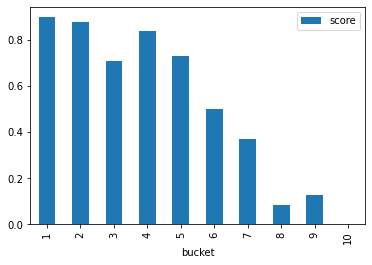

In [1777]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [1778]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [1779]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.9667629915213856


### Median

In [1780]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size=0.4, random_state = 495)

# Convert DataFrame data into np.arrays
# The scikit-learn library requires the data be formatted as a numpy array.
# Here are doing the reformatting
X = np.array(X_train)
print(X, X.shape, "\n")

y = np.array(y_train)
print(y, y.shape, "\n")

clf = neighbors.KNeighborsClassifier(12, weights='uniform')
trained_model = clf.fit(X, y)
print ("Trained Model:", trained_model, "\n")

# view the model's score, which will indicate how good my model has been trained
print ("Score = ", trained_model.score(X, y), "\n")

# Apply the learner to the new, unclassified observation.
y_pred = trained_model.predict(X_test)
print(y_pred, "\n")

# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained_model.predict_proba(X_test)
print(y_pred_proba, "\n")

#Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion, "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

[[-0.16  0.68 -0.94 ... -2.27 -0.66  1.15]
 [ 0.29  0.68  1.01 ...  0.98  0.75  1.15]
 [-2.15 -1.46 -0.94 ...  0.98 -0.66 -0.56]
 ...
 [-2.15  0.68 -0.94 ... -0.65 -0.66  1.15]
 [ 1.17 -1.46 -0.94 ... -0.65 -0.66  1.15]
 [ 1.28 -1.46  1.01 ... -0.65  0.75 -0.56]] (181, 13) 

[0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1] (181,) 

Trained Model: KNeighborsClassifier(n_neighbors=12) 

Score =  0.8342541436464088 

[1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1] 

[[0.   1.  ]
 

#### ROC AUC

In [1781]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.67 0.33]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.42 0.58]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.33 0.67]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.58 0.42]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.67 0.33]
 [0.75 0.25]
 [0.75 0.25]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [1782]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 55 (88%)
True Negative (TN, specificity): 44 (74%)
False Positive (FP): 15 (25%)
False Negative (FN): 7 (11%)


In [1783]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8181818181818182
recall: 0.8870967741935484
precision: 0.7857142857142857
f1: 0.8333333333333333


Confusion matrix, without normalization
[[44 15]
 [ 7 55]]
Normalized confusion matrix
[[0.75 0.25]
 [0.11 0.89]]


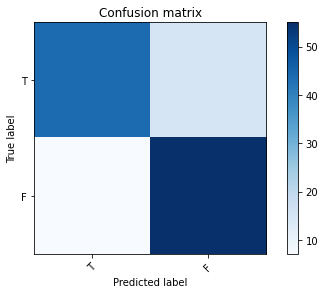

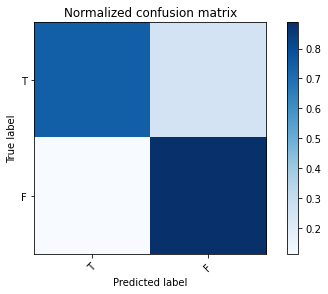

In [1784]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [1785]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_hat)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
Y_HAT: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1]
FPR: [0.   0.25 1.  ]
TPR: [0.   0.89 1.  ]
thresholds: [2 1 0]
Optimal threshold index: 1
Optimal threshold value: 1
AUC: 0.8164297430289776


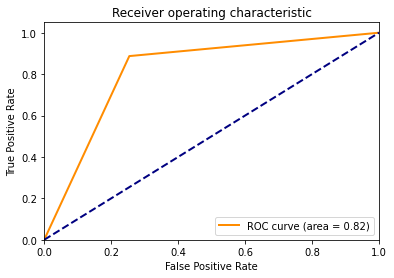

In [1786]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [1787]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.25 1.  ]
TPR: [0.   0.89 1.  ]
thresholds: [2 1 0]


In [1788]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 1 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.67 0.33]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.42 0.58]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.33 0.67]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.58 0.42]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.67 0.33]
 [0.75 0.25]
 [0.75 0.25]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [1789]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 17 (27%)
True Negative (TN, specificity): 57 (96%)
False Positive (FP): 2 (3%)
False Negative (FN): 45 (72%)


In [1790]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.6115702479338843
recall: 0.27419354838709675
precision: 0.8947368421052632
f1: 0.4197530864197531


Confusion matrix, without normalization
[[57  2]
 [45 17]]
Normalized confusion matrix
[[0.97 0.03]
 [0.73 0.27]]


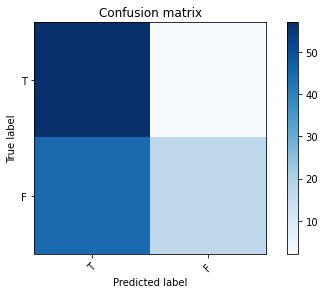

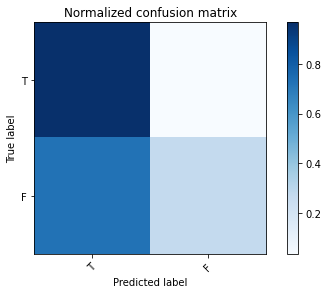

In [1791]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [1792]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [1793]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.99 0.01 0.06 0.99 0.89 0.98 0.66 0.91 0.12 0.22 0.29 0.62 0.99 0.81
 0.08 0.86 0.32 0.99 0.24 0.19 0.98 0.64 0.99 0.52 0.36 0.99 0.63 0.62
 0.77 0.22 0.69 0.99 0.75 0.23 0.08 0.88 0.02 0.05 0.53 0.52 0.07 0.1
 0.01 0.89 0.27 0.84 0.04 0.94 0.95 0.24 0.2  0.04 0.02 0.14 0.99 0.09
 0.33 0.3  0.28 0.35 0.37 0.48 0.06 0.01 0.16 0.99 0.91 0.27 0.99 0.77
 0.7  0.99 0.91 0.41 0.01 0.58 0.68 0.97 0.84 0.72 0.81 0.87 0.99 0.95
 0.92 0.12 0.99 0.45 0.86 0.97 0.34 0.76 0.51 0.72 0.13 0.01 0.86 0.28
 0.99 0.73 0.19 0.37 0.88 0.75 0.82 0.87 0.86 0.02 0.86 0.58 0.06 0.33
 0.34 0.58 0.73 0.45 0.99 0.63 0.99 0.83 0.66 0.91 0.14 0.01 0.98 0.99
 0.9  0.44 0.84 0.12 0.01 0.34 0.56 0.99 0.91 0.4  0.84 0.38 0.99 0.21
 0.36 0.96 0.51 0.99 0.69 0.49 0.88 0.62 0.64 0.86 0.28 0.78 0.93 0.77
 0.36 0.01 0.99 0.05 0.13 0.73 0.4  0.08 0.2  0.01 0.99 0.46 0.99 0.27
 0.81 0.84 0.33 0.09 0.08 0.12 0.11 0.99 0.01 0.56 0.31 0.52 0.31 0.33
 0.39 0.21 0.01 0.15 0.99 0.91 0.08 0.85 0.79 0.75 0.99 0.79 0.27 0.21
 0.41 0

In [1794]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

,y,y_hat,bucket
0,1,0.99,1
156,1,0.99,1
237,1,0.99,1
219,1,0.99,1
209,0,0.99,1
...,...,...,...
415,0,0.01,10
426,0,0.01,10
95,0,0.01,10
74,0,0.01,10


In [1795]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

,y,count
bucket,,
1,44,49.0
2,42,48.0
3,34,48.0
4,41,49.0
5,36,48.0
6,21,48.0
7,16,49.0
8,10,48.0
9,3,48.0


In [1796]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

,tp,count,score
bucket,,,
1,44,49.0,0.897959
2,42,48.0,0.875000
3,34,48.0,0.708333
4,41,49.0,0.836735
5,36,48.0,0.750000
6,21,48.0,0.437500
7,16,49.0,0.326531
8,10,48.0,0.208333
9,3,48.0,0.062500


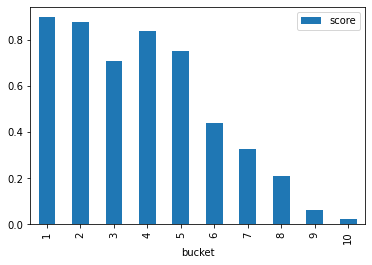

In [1797]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [1798]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [1799]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.9738402136391761


## KMEANS
### Mean

In [1800]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.4, random_state = 495)

# initializing K-Means
model = KMeans(n_clusters=2)

# Fitting with the traning data inputs
model = kmeans.fit(X_train, y_train)

# predicting the clusters
y_pred = model.predict(X_test)
print ("Predictions\n", y_pred)

Predictions
 [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [1801]:
# Getting the cluster centers
C = kmeans.cluster_centers_
print (pd.DataFrame(C, columns = X_test.columns))

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.506972  0.343574 -0.309453  0.035840  0.090144  0.172762 -0.125608   
1 -0.247933 -0.196805  0.377358 -0.047086 -0.086252 -0.070759  0.176248   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.677638  0.647110  0.687748 -0.581675  0.455213  0.186311  
1  0.488416 -0.536035 -0.519941  0.468691 -0.229917 -0.234367  


In [1802]:
#Score
print("Score :", model.score(X_test, y_test), "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Score : -1360.6191878608547 

Accuarcy: 0.8099173553719008
recall: 0.8548387096774194
precision: 0.7910447761194029
f1: 0.8217054263565892


In [1803]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred})

y = np.array(y_test)
y_hat = np.array(y_pred)

print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]
y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
yhat: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [1804]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 53 (85%)
True Negative (TN, specificity): 45 (76%)
False Positive (FP): 14 (23%)
False Negative (FN): 9 (14%)


Confusion matrix, without normalization
[[45 14]
 [ 9 53]]
Normalized confusion matrix
[[0.76 0.24]
 [0.15 0.85]]


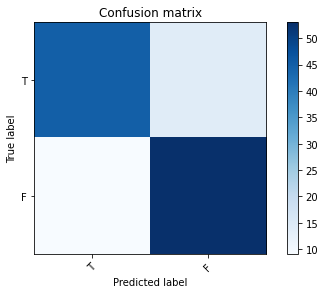

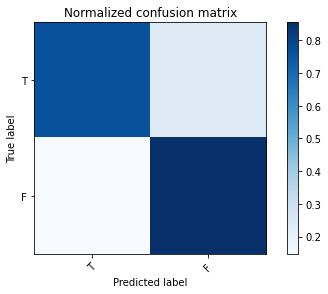

In [1805]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

### Median

In [1860]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size=0.4, random_state = 495)

# initializing K-Means
model = KMeans(n_clusters=2)

# Fitting with the traning data inputs
model = kmeans.fit(X_train, y_train)

# predicting the clusters
y_pred = model.predict(X_test)
print ("Predictions\n", y_pred)

Predictions
 [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [1861]:
# Getting the cluster centers
C = kmeans.cluster_centers_
print (pd.DataFrame(C, columns = X_test.columns))

        age       sex        cp  trestbps     chol       fbs   restecg  \
0  0.371389  0.272455 -0.259088 -0.025182  0.05914  0.086406 -0.103931   
1 -0.223443 -0.204364  0.425685  0.002090 -0.08220 -0.021630  0.197931   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.590476  0.474519  0.602454 -0.627571  0.261198  0.228001  
1  0.569797 -0.536256 -0.603146  0.661512 -0.137557 -0.338724  


In [1862]:
#Score
print("Score :", model.score(X_test, y_test), "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Score : -1371.0247492171463 

Accuarcy: 0.7851239669421488
recall: 0.7903225806451613
precision: 0.7903225806451613
f1: 0.7903225806451614


In [1863]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred})

y = np.array(y_test)
y_hat = np.array(y_pred)

print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred: [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]
y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
yhat: [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [1864]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 49 (79%)
True Negative (TN, specificity): 46 (77%)
False Positive (FP): 13 (22%)
False Negative (FN): 13 (20%)


Confusion matrix, without normalization
[[46 13]
 [13 49]]
Normalized confusion matrix
[[0.78 0.22]
 [0.21 0.79]]


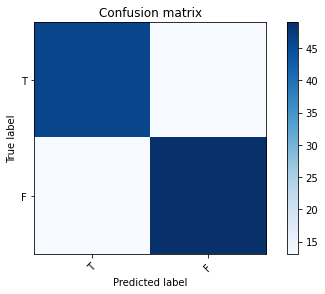

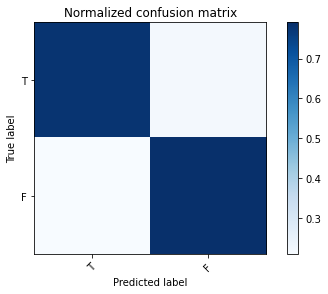

In [1865]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

# MODEL COMPARISON